# Consumer segmentation - choosing optimal cluster numbers for mixed variables

In this exercise, you will 
- use elbow chart to determine how many consumer segments to generate
- segment consumers using the optimal number of segments
- because the data have mixed data types, k-prototypes algorithm should be used


We will use "MallCustomersAllVariables.csv" for analysis. Github link can be found [here](https://github.com/zoutianxin1992/MarketingAnalyticsPython/blob/main/Marketing%20Analytics%20in%20Python/Segmentation/Datasets/MallCustomersTwoVariables.csv).

## Load and preprocess data

In [1]:
# importing packages
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes   # We will use the k-prototypes algorithm
from matplotlib import pyplot as plt

# change variable names
url = "https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/Segmentation/Datasets/MallCustomersAllVariables.csv"
df = pd.read_csv(url,index_col=0) # use the first column (customer id) as index
df = df.rename(columns = {"Gender":"gender",
                         "Age":"age",
                         "Annual Income (k$)":"annual_income",
                         "Spending Score (1-100)":"spending_score"})

# normalizing the data for k-mean algorithm
df_normalized = df.copy() # create a copy of the orignial dataset



df_normalized[['age','annual_income','spending_score']] = \
    (df[['age','annual_income','spending_score']]-df[['age','annual_income','spending_score']].min()) \
    /(df[['age','annual_income','spending_score']].max()-df[['age','annual_income','spending_score']].min())

# "\" breaks a line into multiple lines. There shouldn't be any spaces after "\"
df_normalized.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,M,0.057692,0.000000,0.816327
2,M,0.019231,0.000000,0.387755
3,F,0.096154,0.008197,0.775510
4,F,0.038462,0.008197,0.051020
5,F,0.076923,0.016393,0.765306


## Determine the optimal number of segments

In [2]:
# calculate clustering cost (comparable to SSE) for different k's, and store them in a vector

K = 10  # K is the maximum number of clusters we will check
store_cost = np.zeros(K-1)    # create a vector to store the clustering "cost", which is comparable to SSE in k-means. k is between 2 and K. 

for k in range(2, K+1):                                   # try k from 2 to K  
    kprotoSpec = KPrototypes(n_clusters = k, n_init = 20)                        # set up k-mean model with k clusters
    kproto_result = kprotoSpec.fit(df_normalized, categorical = [0])               # run k-mean on normalized data
    kproto_prediction = kproto_result.labels_                 # the predicted segments for consumers  
    store_cost[k-2] = kproto_result.cost_         # store the clustering cost 

store_cost

array([33.8075906 , 27.48598182, 22.41184792, 18.76122347, 15.89331005,
       13.96002406, 12.2456312 , 10.6021104 ,  9.24994031])

Text(0.5,0,'number of clusters')

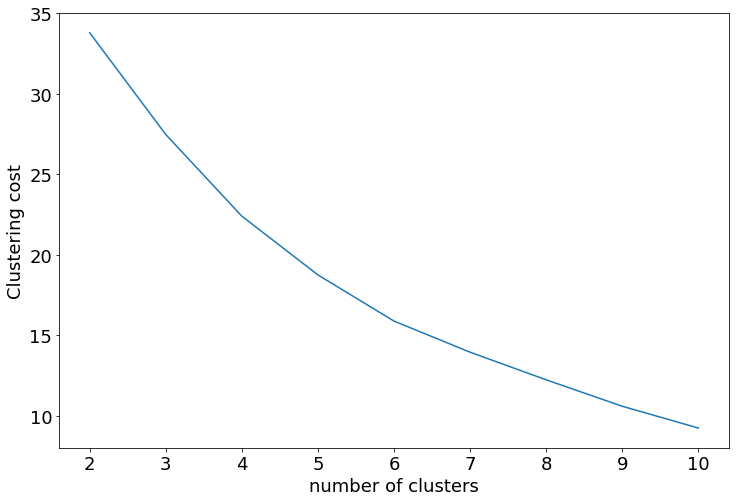

In [3]:
# plot elbow chart

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(2, K+1), store_cost)        
plt.xticks(range(2, K+1), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Clustering cost",fontsize = 18)
plt.xlabel("number of clusters", fontsize = 18)

## Segment consumers using the optimal number of segments

In [6]:
kprotoSpec = KPrototypes(n_clusters = 6, n_init = 20)  # setup the k-mean model specs
kproto_result = kprotoSpec.fit(df_normalized,categorical = [0])    # apply the above model to the normalized data and store the result

## Post-segmentation analysis

### Which segment does each consumer belong to?

Create a new column in the **original** dataframe for which segment a consumer belongs to.

In [7]:
df["segment"] = kproto_result.labels_ 
df.head()

,gender,age,annual_income,spending_score,segment
CustomerID,,,,,
1,M,21,15,81,1
2,M,19,15,39,1
3,F,23,16,77,3
4,F,20,16,6,3
5,F,22,17,76,3


For each segment, summarize the mean/min/max's of all the numerical variable, and the proportion of male consumers in each segment.
Also count the number of consumers in each segment.

In [10]:
# summarize  variables
   
summary_table = df.groupby("segment").aggregate({                           
    "gender": lambda x: x[x == "M"].count()/x.count(),   # lambda allows us to define an inline function
    "age":["mean","min","max"],
    "annual_income": ["mean","min","max"],             
    "spending_score": ["mean","min","max"],            
    "segment": "count"                                   
}
)
summary_table


gender        age         annual_income          spending_score  \
         <lambda>       mean min max          mean min  max           mean   
segment                                                                      
0        0.000000  50.148936  35  68     54.319149  18  101      37.553191   
1        1.000000  28.162162  18  40     54.486486  15  101      67.945946   
2        1.000000  58.037037  37  70     47.629630  19   71      38.851852   
3        0.000000  25.945946  18  35     42.216216  16   76      57.459459   
4        0.730769  38.653846  19  59     90.230769  71  137      16.730769   
5        0.192308  32.269231  27  38     90.346154  70  137      82.730769   

                segment  
        min max   count  
segment                  
0         5  59      47  
1        35  97      37  
2         3  60      27  
3         6  99      37  
4         1  36      26  
5        69  97      26